In [1]:
import aquamonitor as am
import labware as lw
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")
lw.host = am.host = "https://test-aquamonitor.niva.no/"

# Elveovervåkingsprogrammet quality control
# Notebook 01: Compare Aquamonitor and Labware

This initial notebook queries data for the previous (2017 - 2020) Elveovervåkingsprogrammet from both Labware and Aquamonitor. Values are then compared to ensure results can be matched consistently between the two databases (and that my code is converting units etc. correctly).

In [2]:
# Login to am
am_token = am.login()

Please enter your credentials.


Username:  ···
Password:  ··············


In [3]:
# Login to lw
lw.aqua_site = am.aqua_site = "admin/"
lw_token = am.login()

# Reset am to 'AquaServices'
am.aqua_site = "AquaServices"

Please enter your credentials.


Username:  ···
Password:  ··············


## 1. Get historic data from Aquamonitor

### 1.1. Find relevant project IDs

In [4]:
# Get all projects
proj_df = am.get_projects(token=am_token)

# Find the project code for Elveovervåkingsprogrammet
with pd.option_context("display.max_colwidth", None):
    display(proj_df.query("ProjectName.str.contains('lveoverv')", engine="python"))

,ProjectId,ProjectCode,ProjectName,Description
1000,10306,16384-3,Elveovervåkingsprogrammet,Etterfølgeren til RID. Overvåking av tilførsler fra elver til hav. Grunnprogrammet
1040,11126,16384-4,Elveoverv opsj3 2017,Opsjon 3 vannkjemisk overvåking utv elver i 2017
1088,11927,16384-4,Elveoverv opsj3 2018,Opsjon 3 vannkjemisk overvåking utv elver i 2018
1149,12370,16384-19,Elveoverv_Flomprøver,Flomprøver på Elveoverv
1162,12388,NaN,Elveovervåkingen 2017,NaN
1169,12399,16384,Elveovervåkningen Miljøgifter 2018,Miljøgifter fisk Elveovervåkningen 2018
1171,12402,"16384-4,190018",Elveoverv opsj3 2019,Opsjon 3 vannkjemisk overvåking utv elver i 2019
1199,12432,16384,Elveovervåkningen miljøgifter 2019-2020,"Alna, Miljøgifter"
1236,12475,NaN,Elveovervåking biologi 2018,NaN
1237,12476,NaN,Elveovervåkingen 2018,Alle stasjoner for Elveovervåkingen 2018


Based on the above table:

 * Elveovervåkingsprogrammet 2017 - 2020 is project ID 10306 (16384-3)
 * Elveovervåkingsprogrammet 2021 - 2025 is project ID 12564 (200310-3) 

In [5]:
# Define historic project and period of interest
his_proj_id = 10306
st_dt = "01.01.2017"
end_dt = "31.12.2019"

### 1.2. Get historic stations

In [6]:
# Get stations for project
his_stn_df = am.get_project_stations(his_proj_id, token=am_token)
print(f"{len(his_stn_df)} stations in project.")
his_stn_df.head()

21 stations in project.


,ProjectId,StationId,StationCode,StationName,Type
0,10306,40352,BUSEDRA,Drammenselva,Elv
1,10306,40353,TELESKI,Skienselva,Elv
2,10306,40354,VAGEOTR,Otra,Elv
3,10306,40355,VESENUM,Numedalslågen,Elv
4,10306,40356,ØSTEGLO,Glomma ved Sarpsfoss,Elv


### 1.3. Get historic chemistry data

In [7]:
# Get historic water chemsitry
am_df = am.get_project_chemistry(his_proj_id, st_dt, end_dt, token=am_token)
am_df.to_csv(r"../data/rid_am_historic_data.csv", index=False)

In [8]:
# Read previously saved data for speed
am_df = pd.read_csv(r"../data/rid_am_historic_data.csv")
am_df["SampleDate"] = pd.to_datetime(am_df["SampleDate"]).dt.tz_localize(None)
am_df.columns = [
    "project_id",
    "project_name",
    "station_id",
    "station_code",
    "station_name",
    "sample_date",
    "depth1",
    "depth2",
    "parameter",
    "flag",
    "value",
    "unit",
]
am_df.head()

,project_id,project_name,station_id,station_code,station_name,sample_date,depth1,depth2,parameter,flag,value,unit
0,10306,Elveovervåkingsprogrammet,40352,BUSEDRA,Drammenselva,2017-01-23 12:00:00,0.0,0.0,Ca,NaN,4.0,mg/L
1,10306,Elveovervåkingsprogrammet,40352,BUSEDRA,Drammenselva,2017-01-23 12:00:00,0.0,0.0,DOC,NaN,2.7,mg/L C
2,10306,Elveovervåkingsprogrammet,40352,BUSEDRA,Drammenselva,2017-01-23 12:00:00,0.0,0.0,Konduktivitet,NaN,3.5,mS/m
3,10306,Elveovervåkingsprogrammet,40352,BUSEDRA,Drammenselva,2017-01-23 12:00:00,0.0,0.0,Mg,NaN,0.6,mg/L
4,10306,Elveovervåkingsprogrammet,40352,BUSEDRA,Drammenselva,2017-01-23 12:00:00,0.0,0.0,NH4-N,NaN,8.0,µg/l


## 2. Get historic data from Labware

### 2.1. Get Labware projects associated with "main" project

In [9]:
# Define future project and year of interest
fut_proj_id = "16384;3"
fut_yr = 2020

In [10]:
# Get Labware projects
proj_df = lw.get_labware_projects(lw_token, fut_proj_id)
proj_df.head()

,name,status,closed
0,507-9322,P,False
1,507-9366,V,True
2,507-9199,V,True
3,507-8436,V,True
4,507-8437,V,True


### 2.2. Get all samples for Labware projects 

In [11]:
# Get Labware samples
samp_df = lw.get_labware_project_samples(lw_token, proj_df["name"])
samp_df.head()

Station with projectStationId 0 is not in Aquamonitor.
Station with projectStationId 0 is not in Aquamonitor.
Station with projectStationId 0 is not in Aquamonitor.


,sampleNumber,textID,projectStationId,status,sampledDate,sampleDepthUpper,sampleDepthLower,station_id,station_name,station_type
0,121323,NR-2020-07283,42458,P,2020-08-03,0.0,0.0,40360.0,Vefsna,Elv
1,121324,NR-2020-07284,54345,P,2020-08-01,0.0,0.0,69594.0,Målselva v/gml E6-brua,Elv
2,121325,NR-2020-07285,42456,P,2020-08-03,0.0,0.0,40358.0,Altaelva,Elv
3,121326,NR-2020-07286,42476,P,2020-08-10,0.0,0.0,40373.0,Tanaelva,Elv
4,121327,NR-2020-07287,7952,P,2020-08-03,0.0,0.0,40372.0,Pasvikelva,Elv


### 2.3. Get results for Labware samples

In [12]:
# Get results for Labware samples
res_df = lw.get_labware_sample_results(lw_token, samp_df["sampleNumber"])
res_df.head()

,accreditedId,analysis,entryQualifier,loq,mu,name,numericEntry,sample_id,status,test.anaFraction,units
0,None,PBDE,None,None,0.0,BDE154,0.0,121323,N,None,NG_P_L
1,None,PBDE,None,None,0.0,BDE153,0.0,121323,N,None,NG_P_L
2,None,PBDE,None,None,0.0,BDE100,0.0,121323,N,None,NG_P_L
3,None,PBDE,None,None,0.0,BDE99,0.0,121323,N,None,NG_P_L
4,None,PBDE,None,None,0.0,BDE47,0.0,121323,N,None,NG_P_L


### 2.4. Tidy Labware data

In [14]:
# Tidy
samp_df2 = samp_df[
    [
        "sampleNumber",
        "station_id",
        "station_name",
        "station_type",
        "sampledDate",
        "sampleDepthUpper",
        "sampleDepthLower",
    ]
]

samp_df2.columns = [
    "sample_id",
    "station_id",
    "station_name",
    "station_type",
    "sample_date",
    "depth1",
    "depth2",
]

res_df["test.anaFraction"].replace(
    {
        None: "",
        "Partikulært": "-part",
        "Filtrert": "-filt",
    },
    inplace=True,
)
res_df['name'] = res_df['name'] + res_df['test.anaFraction']
res_df2 = res_df[["sample_id", "name", "status", "loq", "numericEntry", "units"]]
res_df2.columns = ["sample_id", "parameter", "status", "loq", "value", "units"]

# Join
lw_df = pd.merge(res_df2, samp_df2, how="left", on="sample_id")

# Add verbose status codes
res_status = pd.read_csv("../data/labware_result_status_codes.csv", sep=";")
lw_df = pd.merge(lw_df, res_status, how="left", on="status")
del lw_df["status"]
lw_df.rename({"description": "status"}, axis="columns", inplace=True)

# Tidy
lw_df = lw_df[
    [
        "sample_id",
        "station_id",
        "station_name",
        "station_type",
        "sample_date",
        "depth1",
        "depth2",
        "parameter",
        "status",
        "loq",
        "value",
        "units",
    ]
]

# # Get only surface samples
# lw_df = lw_df.query("(depth1==0) and (depth2==0)")
# del lw_df["depth1"], lw_df["depth2"]

# Drop duplicates
lw_df.drop_duplicates(inplace=True)

# Remove strange results where station ID is NaN and sample date is '0001-01-01'
lw_df = lw_df.query("station_id == station_id")

lw_df['sample_date'] = pd.to_datetime(lw_df['sample_date'])

# Save
lw_df.to_csv(r"../data/rid_labware_historic_data.csv", index=False)

In [15]:
# Read previously saved data for speed
lw_df = pd.read_csv(r"../data/rid_labware_historic_data.csv")
lw_df["sample_date"] = pd.to_datetime(lw_df["sample_date"])

# # Get just data for the period of interest
# lw_df = lw_df[lw_df["sample_date"].dt.year == fut_yr]

lw_df.head()

,sample_id,station_id,station_name,station_type,sample_date,depth1,depth2,parameter,status,loq,value,units
0,121323,40360.0,Vefsna,Elv,2020-08-03,0.0,0.0,BDE154,Not entered,NaN,0.0,NG_P_L
1,121323,40360.0,Vefsna,Elv,2020-08-03,0.0,0.0,BDE153,Not entered,NaN,0.0,NG_P_L
2,121323,40360.0,Vefsna,Elv,2020-08-03,0.0,0.0,BDE100,Not entered,NaN,0.0,NG_P_L
3,121323,40360.0,Vefsna,Elv,2020-08-03,0.0,0.0,BDE99,Not entered,NaN,0.0,NG_P_L
4,121323,40360.0,Vefsna,Elv,2020-08-03,0.0,0.0,BDE47,Not entered,NaN,0.0,NG_P_L


## 3. Link AM and Labware datasets

The file `../data/lw_am_par_map.csv` was generated using the following SQL in Nivabasen

    SELECT a.name         AS lw_meth,
      a.unit              AS lw_unit,
      b.name              AS am_par,
      b.unit              AS am_unit,
      c.conversion_factor AS lw2am_fac
    FROM NIVADATABASE.METHOD_DEFINITIONS a,
      NIVADATABASE.WC_PARAMETER_DEFINITIONS b,
      NIVADATABASE.WC_PARAMETERS_METHODS c
    WHERE a.method_id  = c.METHOD_ID
    AND c.PARAMETER_ID = b.PARAMETER_ID
    ORDER BY a.name;

In [16]:
# Lookup matching Labware and AM pars
par_map = pd.read_csv(r"../data/lw_am_par_map.csv", sep=";", decimal=",")
par_map.head()

,lw_meth,lw_unit,am_par,am_unit,lw2am_fac
0,Acenaften,UG_P_L,Acenaften,ng/L,1000.0
1,Acenaften,µg/l,Acenaften,ng/L,1000.0
2,Acenaften,UG_P_L,Acenaften,ng/L,1000.0
3,Acenaften,NG_P_L,Acenaften,ng/L,1.0
4,Acenaften,ng/l,Acenaften,ng/L,1.0


In [17]:
# Join AM par names
lw_df = pd.merge(
    lw_df,
    par_map,
    left_on=["parameter", "units"],
    right_on=["lw_meth", "lw_unit"],
    how="left",
)

# Convert units
lw_df["value"] = lw_df["value"] * lw_df["lw2am_fac"]

cols = [
    "sample_id",
    "station_id",
    "station_name",
    "station_type",
    "sample_date",
    "depth1",
    "depth2",
    "am_par",
    "status",
    "value",
    "am_unit",
]
lw_df = lw_df[cols]

# Drop NaNs and duplicates
lw_df = lw_df.query("am_par == am_par")
#lw_df.drop_duplicates(subset=cols, inplace=True)

# # Get just 'authorised' samples
lw_df = lw_df.query("status == 'Authorised'")

# Tidy
lw_df.rename(
    {
        "am_par": "parameter",
        "am_unit": "unit",
    },
    inplace=True,
    axis="columns",
)
lw_df = lw_df[
    ["station_id", "sample_date", "depth1", "depth2", "status", "parameter", "value"]
]

# Standardise dates
am_df["sample_date"] = am_df["sample_date"].dt.date
lw_df["sample_date"] = lw_df["sample_date"].dt.date

# Join
df = pd.merge(
    am_df,
    lw_df,
    how="inner",
    on=["station_id", "sample_date", "depth1", "depth2", "parameter"],
    suffixes=["_am", "_lw"],
)

## 4. Compare values

Text(0, 0.5, 'Value in Labware')

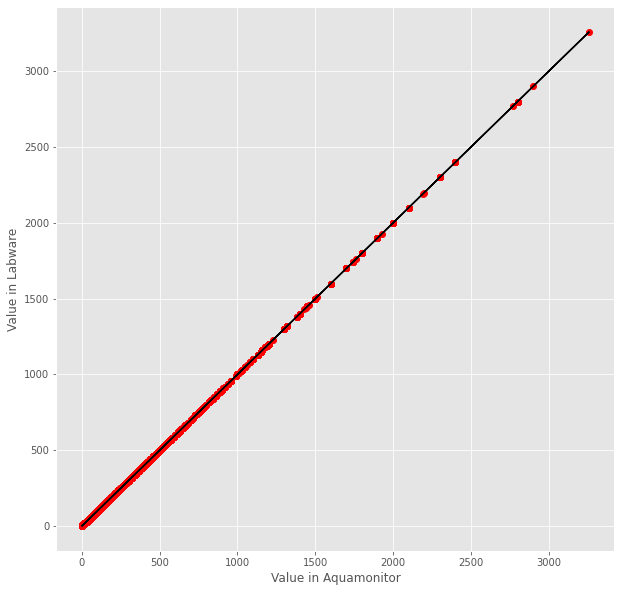

In [18]:
# Plot
fig = plt.figure(figsize=(10, 10))
plt.plot(df["value_am"], df["value_lw"], "ro")
plt.plot(df["value_am"], df["value_am"], "k-")
plt.xlabel("Value in Aquamonitor")
plt.ylabel("Value in Labware")